Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике



In [1]:
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
plt.style.use('ggplot')
%matplotlib inline
pd.set_option('display.max_rows', 400) # показывать больше строк
pd.set_option('display.max_columns', 30) # показывать больше колонок
stud = pd.read_csv('./stud_math.csv')

load data

In [2]:
stud.info()
stud.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Узнаем размеры таблицы:

In [3]:
stud.shape

(395, 30)

Резюме:
-загрузились 30 столбцов, а в описании 29 - отсутствует описание studytime_granular

-всего 395 записей

2.Первичный анализ данных в столбцах 
Из описания датасета и первичного осмотра видно, что:+

-Числовых рядов - 3 (три): age, absences, studytime_granular, score

-Бинарных (два значения) - 12: sex, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic

-Оценочные (несколько значений) - 13:school, address, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health

-Остальные (в том числе Номинальные) (их пока мы не можем отнести к какой-нибудь группе) - 2: , 
проверяем - всего 30 столбцов

In [4]:
print(f'в данных {stud.isnull().any().sum()} колонок имеют неполные данные.')

в данных 27 колонок имеют неполные данные.


In [5]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

переиминовываем колонки для ннашего удобства

In [6]:
stud.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu',
       'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time',
       'fail_res', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'fam_rel',
       'free_time', 'go_out', 'health', 'absences', 'score']

пробуем очистку данных отсечением всех неполных данных

In [7]:
stud_drop = stud.dropna()

In [8]:
stud_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 4 to 391
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              97 non-null     object 
 1   sex                 97 non-null     object 
 2   age                 97 non-null     int64  
 3   address             97 non-null     object 
 4   fam_size            97 non-null     object 
 5   p_status            97 non-null     object 
 6   m_edu               97 non-null     float64
 7   f_edu               97 non-null     float64
 8   m_job               97 non-null     object 
 9   f_job               97 non-null     object 
 10  reason              97 non-null     object 
 11  guardian            97 non-null     object 
 12  travel_time         97 non-null     float64
 13  study_time          97 non-null     float64
 14  fail_res            97 non-null     float64
 15  school_sup          97 non-null     object 
 16  fam_sup  

вариант очистки данных через отсечение всех пропусков не рационален, т.к. остается только 1\3 данных, по этому я разбиваю данные по характеристикам и заполняю пропуски средними или наиболее часто встречающимися вариантами

In [9]:
stud[['studytime_granular', 'study_time']].corr()

,studytime_granular,study_time
studytime_granular,1.0,-1.0
study_time,-1.0,1.0


т.к. studytime_granular коррелирует с study_time со значением 1, то мы можем убрать этот столбец

In [10]:
stud.drop(['studytime_granular'], inplace = True, axis = 1)
stud.head()

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,fail_res,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


вариант очистки данных через отсечение всех пропусков не рационален, т.к. остается только 1\3 данных, по этому я разбиваю данные по характеристикам и заполняю пропуски средними или наиболее часто встречающимися вариантами

In [11]:
num_cols = stud[['age', 'absences','score']]
bin_cols = stud[['sex', 'fam_size', 'p_status','school_sup', 'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']]
categories_cols = pd.DataFrame(stud[['school', 'address', 'm_edu', 'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time', 'fail_res','fam_rel','free_time', 'go_out', 'health']], dtype='object')


In [12]:
num_cols.describe()

,age,absences,score
count,395.000000,383.000000,389.000000
mean,16.696203,7.279373,52.262211
std,1.276043,23.465197,22.919022
min,15.000000,0.000000,0.000000
25%,16.000000,0.000000,40.000000
50%,17.000000,4.000000,55.000000
75%,18.000000,8.000000,70.000000
max,22.000000,385.000000,100.000000


Начинаем по порядку. 



count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

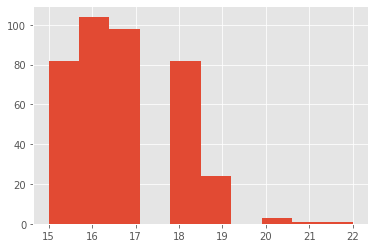

In [13]:
num_cols.age.hist()
num_cols.age.describe()

Возраст - выбросов нет, т.к. изначально указан диапозон возрастов и все значения туда укладываются. пропусков нет.

возрвст больше 20 лет можно посчитать за аномалию, т.к. идет резкое уменьшение учеников с таким возрастом в данной выборке

In [14]:
num_cols.absences.isna().sum()

12

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

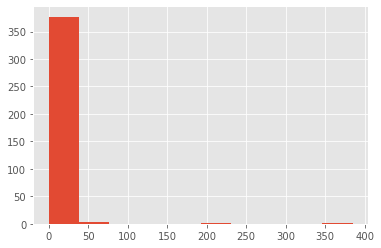

In [15]:
num_cols.absences.hist()
num_cols.absences.describe()

In [16]:
num_cols.absences.unique()
num_cols.absences.value_counts().sort_index()

0.0      111
1.0        3
2.0       60
3.0        8
4.0       53
5.0        5
6.0       31
7.0        6
8.0       21
9.0        3
10.0      17
11.0       2
12.0      12
13.0       2
14.0      12
15.0       2
16.0       7
17.0       1
18.0       5
19.0       1
20.0       4
21.0       1
22.0       3
23.0       1
24.0       1
25.0       1
26.0       1
28.0       1
30.0       1
38.0       1
40.0       1
54.0       1
56.0       1
75.0       1
212.0      1
385.0      1
Name: absences, dtype: int64

In [17]:
median = num_cols.absences.median()
IQR = num_cols.absences.quantile(0.75) - num_cols.absences.quantile(0.25)
perc25 = num_cols.absences.quantile(0.25)
perc75 = num_cols.absences.quantile(0.75)


25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, принят за 30].


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


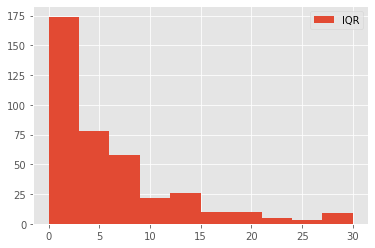

In [18]:
#perc75 + 1.5*IQR  = 30
perc75_new = 30
num_cols.absences = num_cols.absences.apply(lambda x: perc75_new if x >=perc75_new else x)
temp_absences_mean = num_cols.absences.mean()
num_cols.absences = num_cols.absences.apply(lambda x: temp_absences_mean if pd.isna(x) else x)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, принят за {i}].".format(f=perc25 - 1.5*IQR, i = perc75_new))
num_cols.absences.loc[num_cols.absences.between(perc25 - 1.5*IQR, perc75_new)].hist(bins = 10, range = (0, perc75_new), 
                                                                                             label = 'IQR')
plt.legend();


количество пропущенных занятий. пропусков - 12. выбросоми я посчитал все значения больше 30, а не 20 - как это было расчитано межквартильное расстояние, т.к. до 30 все значения встречаются часто и больших пропусков в порядковых значениях нет, а после - следующее значение встречается только через 8 порядковых значений. все значения выбрасов были оставлены и приведены к максимальному значению - 30

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

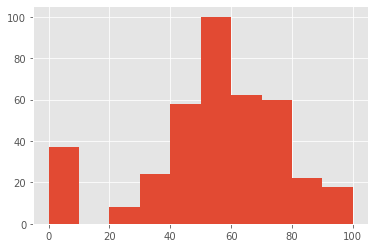

In [19]:
num_cols.score.hist()
num_cols.score.describe()

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, принят за 115.0].


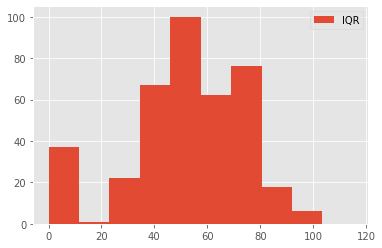

In [20]:
median = num_cols.score.median()
IQR = num_cols.score.quantile(0.75) - num_cols.score.quantile(0.25)
perc25 = num_cols.score.quantile(0.25)
perc75 = num_cols.score.quantile(0.75)
perc75_new = perc75 + 1.5*IQR
temp_absences_mean = num_cols.score.mean()
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, принят за {i}].".format(f=perc25 - 1.5*IQR, i = perc75_new))
num_cols.score.loc[num_cols.score.between(perc25 - 1.5*IQR, perc75_new)].hist(bins = 10, range = (0, perc75_new), 
                                                                                             label = 'IQR')
plt.legend();

In [21]:
num_cols.score.value_counts().sort_index()

0.0      37
20.0      1
25.0      7
30.0     15
35.0      9
40.0     31
45.0     27
50.0     54
55.0     46
60.0     31
65.0     31
70.0     27
75.0     33
80.0     16
85.0      6
90.0     12
95.0      5
100.0     1
Name: score, dtype: int64

т.к. все варианты результатов кратны 5, то мы приводим среднее к числу кратному 5 и устанавливаем его для всех неизвестных элементов. элементы равные 0 - оставляем без изменений, т.к. лни находятся в границах выбросов

In [22]:
a = round(num_cols.score.mean())
a = round(a*2/10)/2*10
num_cols.score = num_cols.score.apply(lambda x: a if pd.isna(x) else x)

финальные результаты - пропусков 8, все пропуски заполнены по среднему значению, кратному 5, т.к. все значения кратны 5. 
возможно, пропуски были у учеников еще не сдавших тесты, и тогда потребуется создать дополнительную колонку указывающюю, сдавал ли ученик тест или нет.

значения 0 оставлены и не являются выбросоми, т.к. укладываются в проверку межкварильным расстоянием. 

In [23]:
num_cols.describe()

,age,absences,score
count,395.000000,395.000000,395.000000
mean,16.696203,5.582245,52.227848
std,1.276043,6.588938,22.745530
min,15.000000,0.000000,0.000000
25%,16.000000,0.000000,40.000000
50%,17.000000,4.000000,55.000000
75%,18.000000,8.000000,70.000000
max,22.000000,30.000000,100.000000


In [24]:
num_cols.corr()

,age,absences,score
age,1.000000,0.187851,-0.155013
absences,0.187851,1.000000,0.058794
score,-0.155013,0.058794,1.000000


как мы видим из корреляции между значениями и целевой колонкой: возраст обратно коррелирует с уровнем сдачи теста, и так же коррелирует с количеством пропущеных занатий. корреляция между пропусками занатий и тестом - минимальна. 

значение 'age' важное для целевого значения.

In [25]:
bin_cols.describe(include=[object])

,sex,fam_size,p_status,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic
count,395,368,350,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,2,2,2,2,2,2
top,F,GT3,T,no,yes,no,yes,yes,yes,yes,no
freq,208,261,314,335,219,200,195,300,356,305,240


начинаем заполнение данных по порядку

In [26]:
for c in bin_cols:
    print(bin_cols[c].unique())

['F' 'M']
[nan 'GT3' 'LE3']
['A' nan 'T']
['yes' 'no' nan]
['no' 'yes' nan]
['no' nan 'yes']
['no' 'yes' nan]
['yes' 'no' nan]
['yes' nan 'no']
[nan 'yes' 'no']
['no' nan 'yes']


заполняем пропуски

In [27]:
data_describe = bin_cols.describe(include=[object])
for c in bin_cols:
    bin_cols[c] = bin_cols[c].fillna(data_describe[c]['top'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
bin_cols.describe(include=[object])

,sex,fam_size,p_status,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,2,2,2,2,2,2
top,F,GT3,T,no,yes,no,yes,yes,yes,yes,no
freq,208,288,359,344,258,240,209,316,376,339,271


In [29]:
categories_cols.head()

,school,address,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,fail_res,fam_rel,free_time,go_out,health
0,GP,U,4,4,at_home,teacher,course,mother,2,2,0,4,3,4,3
1,GP,U,1,1,at_home,other,course,father,1,2,0,5,3,3,3
2,GP,U,1,1,at_home,other,other,mother,1,2,3,4,3,2,3
3,GP,U,4,2,health,NaN,home,mother,1,3,0,3,2,2,5
4,GP,U,3,3,other,other,home,father,1,2,0,4,3,2,5


In [30]:
categories_cols.describe()

,school,address,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,fail_res,fam_rel,free_time,go_out,health
count,395,378,392.0,371.0,376,359,378,364,367.0,388.0,373.0,368.0,384.0,387.0,380.0
unique,2,2,5.0,6.0,5,5,4,3,4.0,4.0,4.0,6.0,5.0,5.0,5.0
top,GP,U,4.0,2.0,other,other,course,mother,1.0,2.0,0.0,4.0,3.0,3.0,5.0
freq,349,295,131.0,106.0,133,197,137,250,242.0,194.0,293.0,182.0,153.0,127.0,138.0


In [31]:
for c in categories_cols:
    print(c, categories_cols[c].unique())

school ['GP' 'MS']
address ['U' nan 'R']
m_edu [4.0 1.0 3.0 2.0 nan 0.0]
f_edu [4.0 1.0 2.0 3.0 40.0 nan 0.0]
m_job ['at_home' 'health' 'other' 'services' 'teacher' nan]
f_job ['teacher' 'other' nan 'health' 'services' 'at_home']
reason ['course' 'other' 'home' 'reputation' nan]
guardian ['mother' 'father' 'other' nan]
travel_time [2.0 1.0 3.0 nan 4.0]
study_time [2.0 3.0 1.0 nan 4.0]
fail_res [0.0 3.0 nan 2.0 1.0]
fam_rel [4.0 5.0 3.0 nan -1.0 2.0 1.0]
free_time [3.0 2.0 4.0 1.0 5.0 nan]
go_out [4.0 3.0 2.0 1.0 5.0 nan]
health [3.0 5.0 1.0 2.0 4.0 nan]


мы можем предположить некоторую корреляцию между образованием отца и матери. так же в категории образование отца есть странное число 40, скорее всего это опечатка

In [32]:
stud.loc[stud.f_edu > 4, 'f_edu'] = 4
mafa_edu = stud[['m_edu', 'f_edu']].dropna()
mafa_edu.corr()

,m_edu,f_edu
m_edu,1.000000,0.625516
f_edu,0.625516,1.000000


корреляция сильная положительная, по этому мы можем заполнить пропуски в этих категориях по второму родителю

In [33]:
categories_cols.loc[categories_cols.f_edu > 4, 'f_edu'] = 4
for i in categories_cols.index:
    if categories_cols['f_edu'][i] not in range(0, 4):
        categories_cols['f_edu'][i] = categories_cols['m_edu'][i]
    if categories_cols['m_edu'][i] not in range(0, 4):
        categories_cols['m_edu'][i] = categories_cols['f_edu'][i]

In [34]:
for c in categories_cols:
    print(c, categories_cols[c].unique())

school ['GP' 'MS']
address ['U' nan 'R']
m_edu [4.0 1.0 2.0 3.0 0.0]
f_edu [4.0 1.0 2.0 3.0 0.0]
m_job ['at_home' 'health' 'other' 'services' 'teacher' nan]
f_job ['teacher' 'other' nan 'health' 'services' 'at_home']
reason ['course' 'other' 'home' 'reputation' nan]
guardian ['mother' 'father' 'other' nan]
travel_time [2.0 1.0 3.0 nan 4.0]
study_time [2.0 3.0 1.0 nan 4.0]
fail_res [0.0 3.0 nan 2.0 1.0]
fam_rel [4.0 5.0 3.0 nan -1.0 2.0 1.0]
free_time [3.0 2.0 4.0 1.0 5.0 nan]
go_out [4.0 3.0 2.0 1.0 5.0 nan]
health [3.0 5.0 1.0 2.0 4.0 nan]


пустые значения времени в пути заполняем по медиане адреса, пустые адреса - по указанному пути 

если пусто и то и другое - по медиане принцивыбора школы

In [35]:
r_mean_time = categories_cols[categories_cols.address == 'R'].travel_time.median()
u_mean_time = categories_cols[categories_cols.address == 'U'].travel_time.median()
for i in categories_cols[categories_cols.travel_time.isna()].index:
    if categories_cols.loc[i, 'address'] == 'R':
        categories_cols.loc[i, 'travel_time'] = r_mean_time
    elif categories_cols.loc[i, 'address'] == 'U':
        categories_cols.loc[i, 'travel_time'] = u_mean_time
        
for i in categories_cols[categories_cols.address.isna()].index:
    if categories_cols.loc[i, 'travel_time'] >= r_mean_time:
        categories_cols.loc[i, 'address'] = 'R'
    elif categories_cols.loc[i, 'travel_time'] <= u_mean_time:
        categories_cols.loc[i, 'address'] = 'U'
        
for i in categories_cols[(categories_cols.address.isna() & categories_cols.travel_time.isna())].index:
    temp_reason = categories_cols.loc[i, 'reason']
    categories_cols.loc[i, 'address'] = categories_cols[categories_cols.reason == temp_reason].address.mode()[0]
    categories_cols.loc[i, 'travel_time'] = categories_cols[categories_cols.reason == temp_reason].travel_time.median()

так же вызывает вопрос значение -1 в fam_rel. принимаем это за опечатку и исправляем. оставшиеся пропуски заполняем по самому встречающимуся

In [36]:
categories_cols[categories_cols.fam_rel == -1].fam_rel = 1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
categories_cols.describe(include=[object])

,school,address,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,fail_res,fam_rel,free_time,go_out,health
count,395,395,395.0,395.0,376,359,378,364,395.0,388.0,373.0,368.0,384.0,387.0,380.0
unique,2,2,5.0,5.0,5,5,4,3,4.0,4.0,4.0,6.0,5.0,5.0,5.0
top,GP,U,3.0,3.0,other,other,course,mother,1.0,2.0,0.0,4.0,3.0,3.0,5.0
freq,349,306,137.0,121.0,133,197,137,250,263.0,194.0,293.0,182.0,153.0,127.0,138.0


в остальных колонках выборосов и странных данных не обнаружено, по этому мы можем заменить все отсутствующие данные по наиболее часто встречающемуся

In [38]:
data_describe = categories_cols.describe(include=[object])
for c in categories_cols:
    top = data_describe[c]['top']
    categories_cols[c] = categories_cols[c].fillna(top)


In [39]:
categories_cols = pd.DataFrame(categories_cols, dtype="object" )
categories_cols.describe(include=[object])

,school,address,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,fail_res,fam_rel,free_time,go_out,health
count,395,395,395.0,395.0,395,395,395,395,395.0,395.0,395.0,395.0,395.0,395.0,395.0
unique,2,2,5.0,5.0,5,5,4,3,4.0,4.0,4.0,6.0,5.0,5.0,5.0
top,GP,U,3.0,3.0,other,other,course,mother,1.0,2.0,0.0,4.0,3.0,3.0,5.0
freq,349,306,137.0,121.0,152,233,154,281,263.0,201.0,315.0,209.0,164.0,135.0,153.0


так же мы видим, что school и address принимают только 2 значения, и эти признаки мы можем перенести в категорию бинарных

In [40]:
bin_cols['school'] = categories_cols['school']
bin_cols['address'] = categories_cols['address']
categories_cols.drop(['school', 'address'], inplace = True, axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


после нам надо перевести все категорийные данные в бинарный формат - т.е. созать количество столбцов по количеству вариантов категорий

In [41]:
categories_cols = pd.get_dummies(categories_cols)
print(categories_cols.columns)

Index(['m_edu_0.0', 'm_edu_1.0', 'm_edu_2.0', 'm_edu_3.0', 'm_edu_4.0',
       'f_edu_0.0', 'f_edu_1.0', 'f_edu_2.0', 'f_edu_3.0', 'f_edu_4.0',
       'm_job_at_home', 'm_job_health', 'm_job_other', 'm_job_services',
       'm_job_teacher', 'f_job_at_home', 'f_job_health', 'f_job_other',
       'f_job_services', 'f_job_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'travel_time_1.0',
       'travel_time_2.0', 'travel_time_3.0', 'travel_time_4.0',
       'study_time_1.0', 'study_time_2.0', 'study_time_3.0', 'study_time_4.0',
       'fail_res_0.0', 'fail_res_1.0', 'fail_res_2.0', 'fail_res_3.0',
       'fam_rel_-1.0', 'fam_rel_1.0', 'fam_rel_2.0', 'fam_rel_3.0',
       'fam_rel_4.0', 'fam_rel_5.0', 'free_time_1.0', 'free_time_2.0',
       'free_time_3.0', 'free_time_4.0', 'free_time_5.0', 'go_out_1.0',
       'go_out_2.0', 'go_out_3.0', 'go_out_4.0', 'go_out_5.0', 'health_1.0',
       'h

In [42]:
categories_cols.head()

,m_edu_0.0,m_edu_1.0,m_edu_2.0,m_edu_3.0,m_edu_4.0,f_edu_0.0,f_edu_1.0,f_edu_2.0,f_edu_3.0,f_edu_4.0,m_job_at_home,m_job_health,m_job_other,m_job_services,m_job_teacher,...,free_time_1.0,free_time_2.0,free_time_3.0,free_time_4.0,free_time_5.0,go_out_1.0,go_out_2.0,go_out_3.0,go_out_4.0,go_out_5.0,health_1.0,health_2.0,health_3.0,health_4.0,health_5.0
0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


переводим бинарные признаки в цифровую интерпритацию

In [43]:
bin_cols.head()

,sex,fam_size,p_status,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,school,address
0,F,GT3,A,yes,no,no,no,yes,yes,yes,no,GP,U
1,F,GT3,T,no,yes,no,no,no,yes,yes,no,GP,U
2,F,LE3,T,yes,no,no,no,yes,yes,yes,no,GP,U
3,F,GT3,T,no,yes,yes,yes,yes,yes,yes,yes,GP,U
4,F,GT3,T,no,yes,yes,no,yes,yes,no,no,GP,U


In [44]:
for c in bin_cols:
    bin_cols[c] = bin_cols[c].apply(lambda x: 1 if x in ['F','GT3', 'A', 'yes', 'GP', 'U'] else 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
bin_cols.head()

,sex,fam_size,p_status,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,school,address
0,1,1,1,1,0,0,0,1,1,1,0,1,1
1,1,1,0,0,1,0,0,0,1,1,0,1,1
2,1,0,0,1,0,0,0,1,1,1,0,1,1
3,1,1,0,0,1,1,1,1,1,1,1,1,1
4,1,1,0,0,1,1,0,1,1,0,0,1,1


объединяем полученные данные в 1 таблицу

In [46]:
data = pd.concat((bin_cols, categories_cols, num_cols), axis=1)
data = pd.DataFrame(data, dtype=float)
print(data.shape)
print (data.columns)

(395, 76)
Index(['sex', 'fam_size', 'p_status', 'school_sup', 'fam_sup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'school',
       'address', 'm_edu_0.0', 'm_edu_1.0', 'm_edu_2.0', 'm_edu_3.0',
       'm_edu_4.0', 'f_edu_0.0', 'f_edu_1.0', 'f_edu_2.0', 'f_edu_3.0',
       'f_edu_4.0', 'm_job_at_home', 'm_job_health', 'm_job_other',
       'm_job_services', 'm_job_teacher', 'f_job_at_home', 'f_job_health',
       'f_job_other', 'f_job_services', 'f_job_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'travel_time_1.0',
       'travel_time_2.0', 'travel_time_3.0', 'travel_time_4.0',
       'study_time_1.0', 'study_time_2.0', 'study_time_3.0', 'study_time_4.0',
       'fail_res_0.0', 'fail_res_1.0', 'fail_res_2.0', 'fail_res_3.0',
       'fam_rel_-1.0', 'fam_rel_1.0', 'fam_rel_2.0', 'fam_rel_3.0',
       'fam_rel_4.0', 'fam_rel_5.0', 'free_time_1.0', 'free_t

попробуем получить значимые признаки через корреляцию значений

In [77]:
data.corr()

,sex,fam_size,p_status,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,school,address,m_edu_0.0,m_edu_1.0,...,free_time_4.0,free_time_5.0,go_out_1.0,go_out_2.0,go_out_3.0,go_out_4.0,go_out_5.0,health_1.0,health_2.0,health_3.0,health_4.0,health_5.0,age,absences,score
sex,1.000000,0.083793,0.035993,0.138271,0.171959,0.107785,-0.112306,-0.005070,0.142296,-0.065578,0.138798,-0.012286,0.010508,-0.005385,0.019849,...,-0.089742,-0.206522,0.040893,0.021098,0.031124,-0.002886,-0.095713,0.097888,0.005811,0.062310,0.039127,-0.151623,0.028606,0.043320,-0.098967
fam_size,0.083793,1.000000,-0.064290,0.030837,0.094415,0.081517,0.018433,-0.091145,0.022713,-0.002770,-0.005034,0.062853,-0.056024,0.004753,-0.091209,...,-0.084184,0.024992,0.005604,0.056926,-0.029190,-0.031262,0.001450,-0.057504,0.011853,0.001484,0.032141,0.005210,-0.020143,-0.029096,-0.065605
p_status,0.035993,-0.064290,1.000000,0.035463,0.008983,-0.020295,-0.088960,0.070371,0.030077,-0.047818,0.051152,0.060121,0.044454,-0.032029,-0.109509,...,-0.101633,0.045842,0.071513,-0.044462,0.012912,0.050396,-0.071266,0.046633,-0.054196,-0.023400,0.054253,-0.017051,-0.014241,0.149764,0.040580
school_sup,0.138271,0.030837,0.035463,1.000000,0.106096,-0.031119,0.106107,0.041524,0.051272,0.004986,-0.065237,0.139789,0.026946,-0.038945,0.026360,...,-0.074720,0.002398,0.065460,0.033911,-0.086439,0.039751,-0.015942,-0.001594,0.035102,0.009196,0.059094,-0.073685,-0.251811,0.043468,-0.085951
fam_sup,0.171959,0.094415,0.008983,0.106096,1.000000,0.237031,-0.026762,0.047871,0.084767,0.085045,0.045932,0.199739,0.039870,-0.085674,-0.151007,...,-0.060828,0.021281,0.022196,0.036948,-0.001987,-0.063250,0.016289,-0.027907,0.032685,-0.027139,0.012357,0.011637,-0.148666,0.070542,0.005904
paid,0.107785,0.081517,-0.020295,-0.031119,0.237031,1.000000,-0.000131,0.116657,0.180652,0.148262,0.059678,0.016982,0.061107,-0.029498,-0.123425,...,-0.022424,-0.033609,-0.066982,0.028132,-0.043448,0.038494,0.024458,0.088987,-0.014539,-0.023877,0.032265,-0.053620,-0.015913,0.004921,0.095787
activities,-0.112306,0.018433,-0.088960,0.106107,-0.026762,-0.000131,1.000000,-0.002536,0.072368,0.067327,-0.039454,0.116045,-0.035313,-0.056558,-0.067077,...,-0.014187,0.049773,-0.003674,-0.028374,-0.015296,0.056452,-0.007709,0.017727,0.020324,-0.098225,0.036928,0.031709,-0.129367,-0.064122,0.003211
nursery,-0.005070,-0.091145,0.070371,0.041524,0.047871,0.116657,-0.002536,1.000000,0.065072,0.032660,0.010910,0.094709,0.063626,-0.012643,-0.176336,...,-0.036510,-0.008586,0.070271,-0.084146,0.026688,0.074244,-0.067390,0.046915,0.012192,-0.093924,0.044944,0.007795,-0.094359,0.045445,0.049035
higher,0.142296,0.022713,0.030077,0.051272,0.084767,0.180652,0.072368,0.065072,1.000000,0.044308,-0.128371,0.029040,0.048679,-0.095434,-0.102645,...,0.062667,-0.087155,-0.095674,0.023275,0.062203,0.058999,-0.122430,0.046070,-0.073375,0.007958,0.033295,-0.015556,-0.202123,-0.010970,0.183498
internet,-0.065578,-0.002770,-0.047818,0.004986,0.085045,0.148262,0.067327,0.032660,0.044308,1.000000,0.071622,0.101331,0.180360,-0.031382,-0.191973,...,0.046352,0.009534,-0.053905,-0.061240,0.002131,0.033858,0.072387,0.104534,0.048846,-0.058757,-0.001355,-0.049298,-0.102582,0.080078,0.055834


In [73]:
correlation = data.corr()
res = []
for i in correlation.score.index:
    if 1 > abs(correlation.score[i]) > 0.2 :
        res.append({i:correlation.score[i]})
res    
        

[{'fail_res_0.0': 0.33504485475909257}]

наиболее сильная корреляция выявлена с отсутствием внеучебных неудачь

In [74]:
correlation = data.corr()
res = []
for i in correlation.score.index:
    if 0.2 >= abs(correlation.score[i]) > 0.1 :
        res.append({i:correlation.score[i]})
res    
        

[{'higher': 0.18349836143821074},
 {'romantic': -0.13477759317646365},
 {'m_edu_1.0': -0.1672552877157872},
 {'m_edu_4.0': 0.11552805629030184},
 {'f_edu_1.0': -0.13400265049128796},
 {'f_edu_4.0': 0.11552805629030184},
 {'m_job_at_home': -0.11940187860445144},
 {'m_job_health': 0.10975089432580527},
 {'study_time_3.0': 0.10507571785710629},
 {'fail_res_1.0': -0.19918420889880267},
 {'fail_res_2.0': -0.16995329694257144},
 {'fail_res_3.0': -0.18565822088507136},
 {'free_time_2.0': 0.10185917282181324},
 {'free_time_3.0': -0.10298835157979402},
 {'go_out_5.0': -0.13047707617786747},
 {'health_1.0': 0.11540852949133924},
 {'age': -0.15501278472814664}]

так же как мы видим не очень сильно положительно влияют: higher, m_edu_4, study_time_3, free_time_2, m_job_health, health_1;
а слабо отрицательно отрицательно: romantic, m_edu_1, f_edu_1, m_job_at_home, fail_res_1,fail_res_2, fail_res_3, а слабо отрицательно отрицательно: romantic, m_edu_1, f_edu_1, m_job_at_home, fail_res_1,fail_res_2, fail_res_3, free_time_3, age
        